### Analysis of the Datasets from the Competition

* Save zip file in this same path
* Repo should be in: ./birdclef-2022

In [3]:
%pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)

  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)


     ---------------------------------------- 2.5/2.5 MB 8.7 MB/s eta 0:00:00
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached soundfile-0.11.0-py2.py3-none-win_amd64.whl (1.0 MB)
     ---------------------------------------- 23.2/23.2 MB 8.7 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23710 sha256=cdd34b5bd47ac075704568c4f952dae1be6c22ec0c20caf89e2c0035aa00d855
  Stored in directory: c:\users\dalma\appdata\local\pip\cache\wheels\0a\ed\be\49df2538fca496690a024a4374455584d65c2afd6fc3d6e9c7
Successfully built audioread


In [4]:
#%pip install torchaudio
#%pip install PySoundFile
#%pip install librosa
%pip install timm

  Using cached timm-0.6.11-py3-none-any.whl (548 kB)
     -------------------------------------- 163.5/163.5 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     -------------------------------------- 155.4/155.4 kB 9.1 MB/s eta 0:00:00
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install torchaudio
import torch
import torchaudio 
import multiprocessing
import os
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from IPython.display import Audio, display
import librosa
import timm
#from torchaudio.utils import download_asset
import json
DATA_PATH = "input/"

     -------------------------------------- 969.5/969.5 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Listen to audio file

In [7]:
audiofile = './test_soundscapes/soundscape_453028782.ogg'
audiofile = 'C:/Users/dalma/Desktop/AI4GOOD/birdclef-2022_data/train_audio/afrsil1/XC125458.ogg'
Audio(audiofile,rate=22050)

#### Extraction of metadata directly

In [8]:
print(str(torchaudio.get_audio_backend())) # should prompt 'SoundFile' or 'Sox' for Linux
metadata = torchaudio.info(audiofile)
print(metadata)

soundfile
AudioMetaData(sample_rate=32000, num_frames=355265, num_channels=1, bits_per_sample=0, encoding=VORBIS)


In [10]:
with open('C:/Users/dalma/Desktop/AI4GOOD/birdclef-2022_data/scored_birds.json') as f:
    birds = json.load(f)
print('Number of labeled birds species: ' + str(len(birds)))

Number of labeled birds species: 21


In [11]:
metadata = pd.read_csv(f'{DATA_PATH}train_metadata.csv')
metadata.head(1)
#TODO: why don't I have the metadata?

FileNotFoundError: [Errno 2] No such file or directory: 'input/train_metadata.csv'

## 1st attempt: model based on https://arxiv.org/abs/1710.09412

#### Pre-processing: Convert audio inputs to spectogram to fill the CNN

In [8]:
from os import listdir
from os.path import isfile, join
count=0
mel_specgram=[0]*2000  #TODO: find the lenght
mypath="C:/Users/dalma/Desktop/AI4GOOD/birdclef-2022_data/train_audio/"
onlydirectories = [f for f in listdir(mypath)] # if isfile(join(mypath, f))]
print(onlydirectories)
#for i in "C:/Users/dalma/Desktop/AI4GOOD/birdclef-2022_data/train_audio":
for i in onlydirectories:
    onlyfiles = [f for f in listdir(os.path.join(mypath,i))  if isfile(join(mypath, i, f))]
    #print(onlyfiles)
    for j in onlyfiles:
        audiofile = os.path.join(mypath,i,j)
        #print(audiofile)
        Audio(audiofile,rate=22050)
        waveform, sample_rate = torchaudio.load(audiofile, normalize=False)
        transform = torchaudio.transforms.MelSpectrogram(sample_rate)
        mel_specgram[count] = transform(waveform)
        print(mel_specgram[count].shape)
        #mel_specgram[count]=mel_specgram[count].reshape(128,1777)
        count=count+1
    '''if count>1:
        break'''


['afrsil1', 'akekee', 'akepa1', 'akiapo', 'akikik', 'amewig', 'aniani', 'apapan', 'arcter', 'barpet', 'bcnher', 'belkin1', 'bkbplo', 'bknsti', 'bkwpet', 'blkfra', 'blknod', 'bongul', 'brant', 'brnboo', 'brnnod', 'brnowl', 'brtcur', 'bubsan', 'buffle', 'bulpet', 'burpar', 'buwtea', 'cacgoo1', 'calqua', 'cangoo', 'canvas', 'caster1', 'categr', 'chbsan', 'chemun', 'chukar', 'cintea', 'comgal1', 'commyn', 'compea', 'comsan', 'comwax', 'coopet', 'crehon', 'dunlin', 'elepai', 'ercfra', 'eurwig', 'fragul', 'gadwal', 'gamqua', 'glwgul', 'gnwtea', 'golphe', 'grbher3', 'grefri', 'gresca', 'gryfra', 'gwfgoo', 'hawama', 'hawcoo', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1', 'hoomer', 'houfin', 'houspa']
torch.Size([1, 128, 1777])
torch.Size([1, 128, 7524])

c:\Users\dalma\AppData\Local\Programs\PythonCodingPack\lib\site-packages\torchaudio\functional\functional.py:539: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(



torch.Size([1, 128, 8602])
torch.Size([2, 128, 16878])
torch.Size([2, 128, 544])
torch.Size([2, 128, 561])
torch.Size([2, 128, 6859])
torch.Size([2, 128, 5576])
torch.Size([2, 128, 7060])
torch.Size([2, 128, 5108])
torch.Size([2, 128, 4941])
torch.Size([2, 128, 1601])
torch.Size([1, 128, 4356])
torch.Size([2, 128, 1919])
torch.Size([1, 128, 5265])
torch.Size([2, 128, 4159])


We define Mixup, CutSpec, and SpecAugment, as suggested in http://ceur-ws.org/Vol-3180/paper-170.pdf

In [9]:
def mixup_data(x, y, alpha=1.0, use_cuda=True):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

In [10]:
#As implemented in https://github.com/anas-r-dev/specmix-pytorch/blob/main/specmix.py.
#Specmix should be cutmix specifically for spectrograms

import random
import torch

def get_band(x, min_band_size, max_band_size, band_type, mask):
    assert band_type.lower() in ['freq', 'time'], f"band_type must be in ['freq', 'time']"
    if band_type.lower() == 'freq':
        axis = 2
    else:
        axis = 1
    band_size =  random.randint(min_band_size, max_band_size)
    mask_start = random.randint(0, x.size()[axis] - band_size) 
    mask_end = mask_start + band_size
    
    if band_type.lower() == 'freq':
        mask[:, mask_start:mask_end] = 1
    if band_type.lower() == 'time':
        mask[mask_start:mask_end, :] = 1
    return mask

def specmix(x, y, prob, min_band_size, max_band_size, max_frequency_bands=3, max_time_bands=3):
    if prob < 0:
        raise ValueError('prob must be a positive value')

    k = random.random()
    if k > 1 - prob:
        batch_size = x.size()[0]
        batch_idx = torch.randperm(batch_size)
        print(batch_idx)
        mask = torch.zeros(x.size()[1:3])
        num_frequency_bands = random.randint(1, max_frequency_bands)
        for i in range(1, num_frequency_bands):
            mask = get_band(x, min_band_size, max_band_size, 'freq', mask)
        num_time_bands = random.randint(1, max_time_bands)
        for i in range(1, num_time_bands):
            mask = get_band(x, min_band_size, max_band_size, 'time', mask)
        lam = torch.sum(mask) / (x.size()[1] * x.size()[2])
        x = x * (1 - mask) + x[batch_idx] * mask
        y = y * (1 - lam) + y[batch_idx] * (lam)
        return x, y
    else:
        return x, y

In [31]:
# Implementation of SpecAugment: A Simple Data Augmentation Method for Automatic Speech Recognition
# Ref: https://arxiv.org/pdf/1904.08779.pdf

import random
import numpy as np
import tensorflow as tf
#import tensorflow_addons
from tensorflow_addons.image import sparse_image_warp


class SpecAugment():
    '''
    Augmentation Parameters for policies
    -----------------------------------------
    Policy | W  | F  | m_F |  T  |  p  | m_T
    -----------------------------------------
    None   |  0 |  0 |  -  |  0  |  -  |  -
    -----------------------------------------
    LB     | 80 | 27 |  1  | 100 | 1.0 | 1
    -----------------------------------------
    LD     | 80 | 27 |  2  | 100 | 1.0 | 2
    -----------------------------------------
    SM     | 40 | 15 |  2  |  70 | 0.2 | 2
    -----------------------------------------
    SS     | 40 | 27 |  2  |  70 | 0.2 | 2
    -----------------------------------------
    
    LB  : LibriSpeech basic
    LD  : LibriSpeech double
    SM  : Switchboard mild
    SS  : Switchboard strong
    W   : Time Warp parameter
    F   : Frequency Mask parameter
    m_F : Number of Frequency masks
    T   : Time Mask parameter
    p   : Parameter for calculating upper bound for time mask
    m_T : Number of time masks
    '''
    
    def __init__(self, mel_spectrogram, policy, zero_mean_normalized=True):
        self.mel_spectrogram = mel_spectrogram
        self.policy = policy
        self.zero_mean_normalized = zero_mean_normalized
        
        # Policy Specific Parameters
        if self.policy == 'LB':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 1, 100, 1.0, 1
        elif self.policy == 'LD':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 2, 100, 1.0, 2
        elif self.policy == 'SM':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 15, 2, 70, 0.2, 2
        elif self.policy == 'SS':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 27, 2, 70, 0.2, 2
        
        
    def time_warp(self):
    
        # Reshape to [Batch_size, time, freq, 1] for sparse_image_warp func.
        self.mel_spectrogram = np.reshape(self.mel_spectrogram, (-1, self.mel_spectrogram.shape[0], self.mel_spectrogram.shape[1], 1))

        print(self.mel_spectrogram.shape)
        
        v, tau = self.mel_spectrogram.shape[1], self.mel_spectrogram.shape[2]
        
        horiz_line_thru_ctr = self.mel_spectrogram[0][v//2]

        print(v,tau,horiz_line_thru_ctr)
    
        random_pt = horiz_line_thru_ctr[random.randrange(self.W, tau - self.W)] # random point along the horizontal/time axis
        w = np.random.uniform((-self.W), self.W) # distance
        
        # Source Points
        src_points = [[[v//2, int(random_pt[0])]]]
        print(src_points)
        
        # Destination Points
        dest_points = [[[v//2, int(random_pt[0] + w)]]]    #TODO: why do I get error?
        
        self.mel_spectrogram, _ = sparse_image_warp(self.mel_spectrogram, src_points, dest_points, num_boundary_points=2)
    
        return self.mel_spectrogram
    
    
    def freq_mask(self):
        
        v = self.mel_spectrogram.shape[1] # no. of mel bins
        
        # apply m_F frequency masks to the mel spectrogram
        for i in range(self.m_F):
            f = int(np.random.uniform(0, self.F)) # [0, F)
            f0 = random.randint(0, v - f) # [0, v - f)
            self.mel_spectrogram[:, f0:f0 + f, :, :] = 0
            
        return self.mel_spectrogram
    
    
    def time_mask(self):
    
        tau = self.mel_spectrogram.shape[2] # time frames
        
        # apply m_T time masks to the mel spectrogram
        for i in range(self.m_T):
            t = int(np.random.uniform(0, self.T)) # [0, T)
            t0 = random.randint(0, tau - t) # [0, tau - t)
            self.mel_spectrogram[:, :, t0:t0 + t, :] = 0
            
        return self.mel_spectrogram

#Now, apply it to our data. #NB: we directly apply it to the spectrograms
# Apply SpecAugment
args={
        'policy':'LB'
    }
policy='SM' #TODO: TUNE IT
mel_spectrogram=mel_specgram[1]
apply = SpecAugment(mel_spectrogram, policy)

time_warped = apply.time_warp() # Applies Time Warping to the mel spectrogram
#plt.figure(figsize=(14, 6))
#librosa.display.specshow(librosa.power_to_db(time_warped[0, :, :, 0].numpy(), ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Time Warped

freq_masked = apply.freq_mask() # Applies Frequency Masking to the mel spectrogram

time_masked = apply.time_mask() # Applies Time Masking to the mel spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(time_masked[0, :, :, 0], ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Time Masked

torch.Size([7524, 1, 128, 1])
1 128 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]

TypeError: Cannot convert 0.5 to EagerTensor of dtype int32

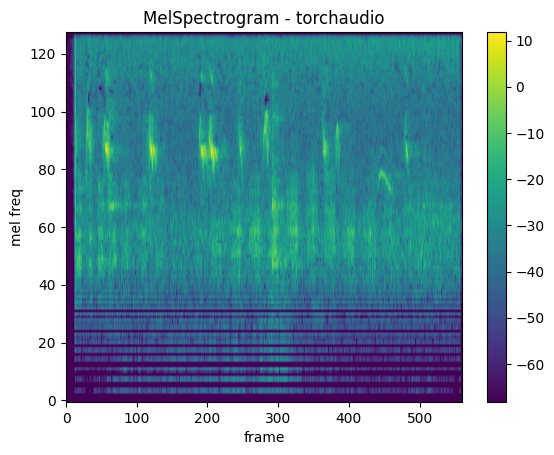

torch.Size([128, 16878])


In [72]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

plot_spectrogram(mel_specgram[5][0], title="MelSpectrogram - torchaudio", ylabel='mel freq')
#TODO: the data will be the 0 component!
print(mel_specgram[3][0].shape)




#### Next step: build the data

#### Timm models

In [27]:
len(timm.list_models('*'))

889